In [116]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-
'''
@filename              :trainmodelML.ipynb
@createFileTime        :2022/12/05 14:59:45
@author                :THEIIKU
@version               :1.0
@description           :
Created in JLU SENSORLAB
'''



'\n@filename              :trainmodelML.ipynb\n@createFileTime        :2022/12/05 14:59:45\n@author                :THEIIKU\n@version               :1.0\n@description           :\nCreated in JLU SENSORLAB\n'

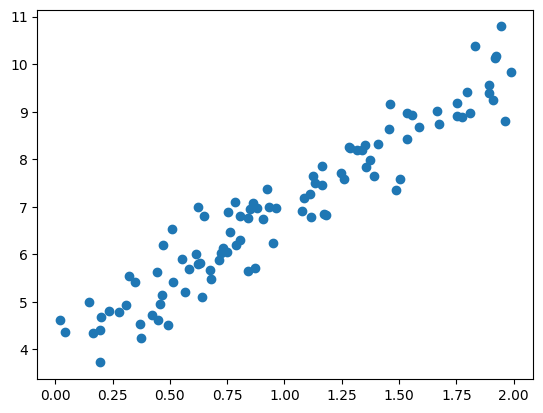

In [117]:
import numpy as np
import matplotlib.pyplot as plt
x = 2 * np.random.rand(100,1)
y = 4 + 3*x + 0.5*np.random.randn(100,1)
plt.scatter(x,y)
#生成一组分布在直线周围的随机点

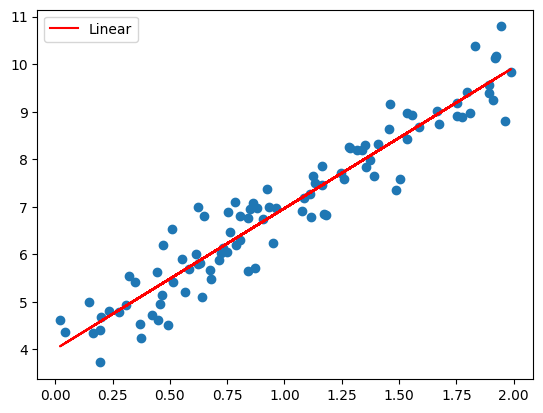

In [118]:
#线性回归拟合
from sklearn.linear_model import LinearRegression

line_reg = LinearRegression()
line_reg.fit( x , y )

plt.scatter(x,y)
plt.plot(x,line_reg.predict(x),'r' , label = "Linear")
plt.legend()
plt.show()
#此示例为一元线性回归

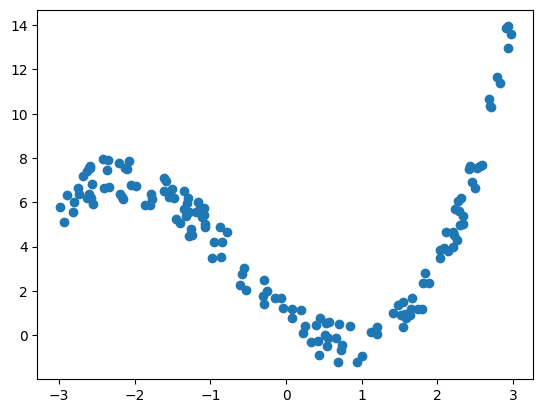

In [119]:
#多项式回归
m =150

x = 6*np.random.rand ( m, 1 ) - 3

x = np.array(sorted(x))
#random产生的数组是乱序的，要排序之后才能画出拟合曲线
y = 0.5 * x ** 3 + x **2-3* x +2*np.random.rand( m , 1 )

plt.scatter(x,y)


[[ 1.00000000e+00 -2.98955838e+00  8.93745928e+00 -2.67190562e+01]
 [ 1.00000000e+00 -2.93823232e+00  8.63320915e+00 -2.53663741e+01]
 [ 1.00000000e+00 -2.89743107e+00  8.39510680e+00 -2.43242433e+01]
 [ 1.00000000e+00 -2.81571293e+00  7.92823928e+00 -2.23236458e+01]
 [ 1.00000000e+00 -2.80218874e+00  7.85226173e+00 -2.20035194e+01]
 [ 1.00000000e+00 -2.75076412e+00  7.56670325e+00 -2.08142158e+01]
 [ 1.00000000e+00 -2.73224099e+00  7.46514081e+00 -2.03965637e+01]
 [ 1.00000000e+00 -2.68895903e+00  7.23050065e+00 -1.94425200e+01]
 [ 1.00000000e+00 -2.63290858e+00  6.93220759e+00 -1.82518688e+01]
 [ 1.00000000e+00 -2.62812177e+00  6.90702403e+00 -1.81525002e+01]
 [ 1.00000000e+00 -2.60775788e+00  6.80040116e+00 -1.77337997e+01]
 [ 1.00000000e+00 -2.60144219e+00  6.76750148e+00 -1.76052639e+01]
 [ 1.00000000e+00 -2.59378559e+00  6.72772371e+00 -1.74502728e+01]
 [ 1.00000000e+00 -2.58656433e+00  6.69031504e+00 -1.73049303e+01]
 [ 1.00000000e+00 -2.57833896e+00  6.64783181e+00 -1.71403638e

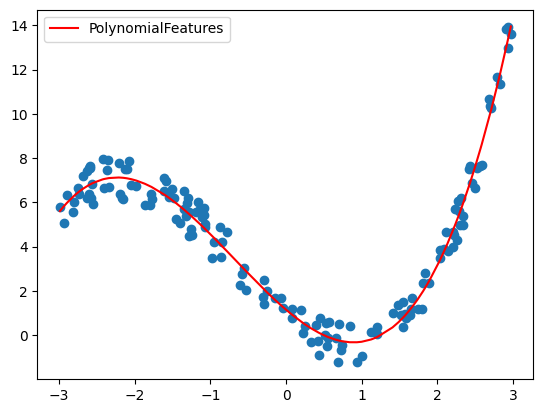

In [120]:
#多项式回归p
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 

degree = 3
poly_features = PolynomialFeatures( degree= degree )
x_poly = poly_features.fit_transform(x)

line_reg = LinearRegression()
line_reg.fit(x_poly , y )
y_poly  = line_reg.predict(x_poly)

plt.plot(x , y_poly,c = 'r',label = "PolynomialFeatures")
plt.scatter(x , y )
plt.legend()
print(x_poly)

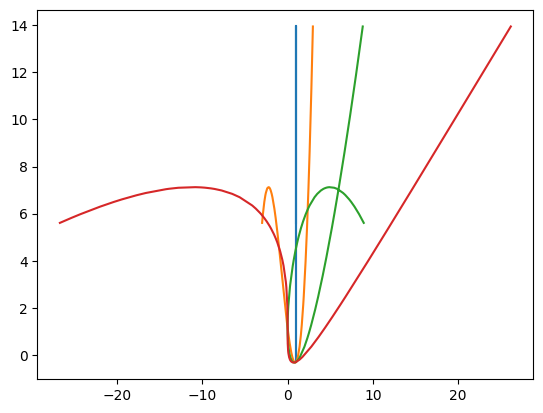

In [121]:
plt.plot(x_poly , y_poly )

多项式回归的本质上讲依旧是线性回归
多项式回归是将多元线性回归的输入换成预处理后的多项式系数，训练过程

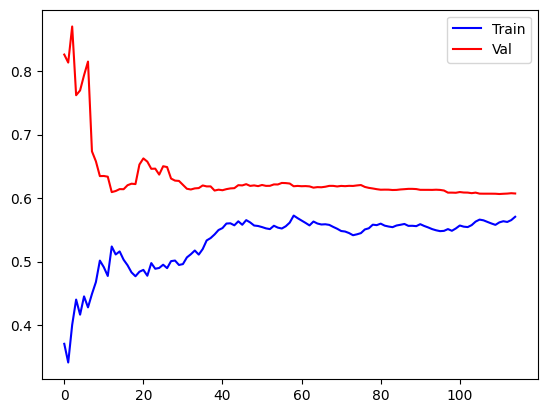

In [122]:
#绘制学习曲线
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learing_curves( model , x , y ,start = 5):#默认最小数据集个数为5,去除极值点影响
    x_train , x_val , y_train , y_val = train_test_split( x , y , test_size= 0.2)
    #分割数据集
    train_errors , val_errors  = [] , []
    #训练错误率和验证错误率
    
    for m in range(start,len(x_train)):#遍历训练集大小时不能包含0,不然会报错
        model.fit(x_train[:m] , y_train[:m])

        y_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        #训练集和测试集的预测结果

        train_errors.append(mean_squared_error(y_train[:m], y_predict))
        val_errors.append(mean_squared_error(y_val , y_val_predict))

    plt.plot(np.sqrt(train_errors)  , c = 'b' , label = "Train")
    plt.plot(np.sqrt(val_errors)    , c = 'r' , label = "Val")
    plt.legend()
       

line_reg = LinearRegression()

plot_learing_curves(line_reg , x_poly ,y )

学习曲线（learning curve）的作用是确定模型的最佳数据数量，减少采集难度
当训练集和验证集的均方差或标准差收敛到一个确定范围后，即可认为该数量的数据集有效

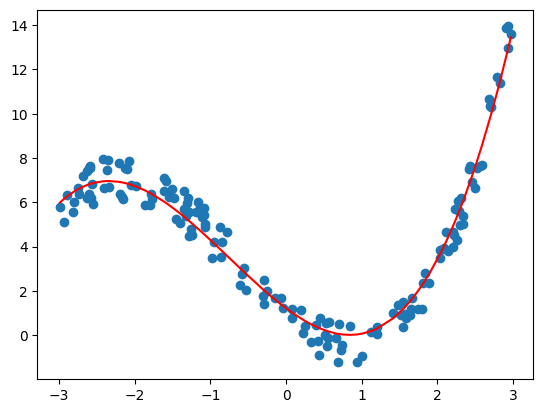

In [123]:
#岭回归
from sklearn.linear_model import Ridge

ridge_reg  = Ridge(alpha = 10 , solver = "cholesky")
ridge_reg.fit(x_poly , y)

y_poly = ridge_reg.predict(x_poly)

plt.plot(x, y_poly , c = 'r' )
plt.scatter(x , y )



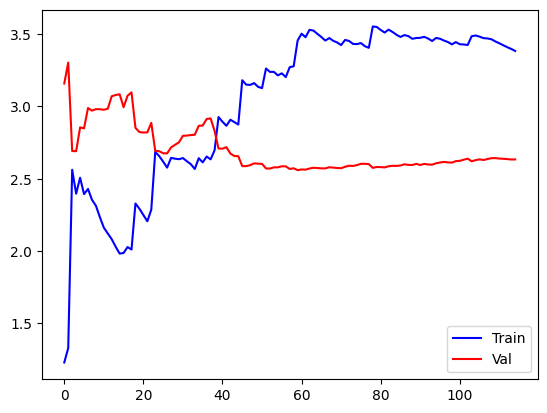

In [124]:
plot_learing_curves(ridge_reg , x ,y )

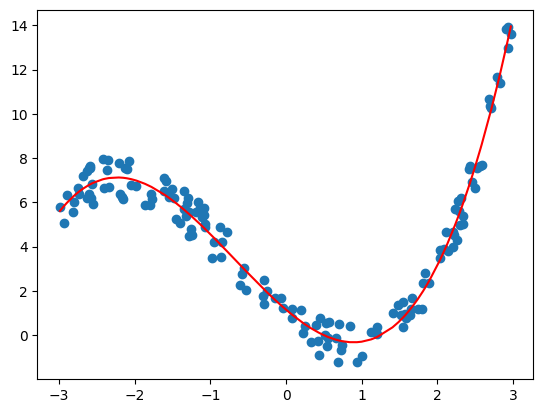

In [125]:
#lasso
from sklearn.linear_model import Lasso

lasso_reg =  Lasso(alpha= 0.001)
#alpha是惩罚系数
lasso_reg.fit(x_poly , y )

y_poly = lasso_reg.predict(x_poly)
plt.plot(x, y_poly , c = 'r' )
plt.scatter(x , y )

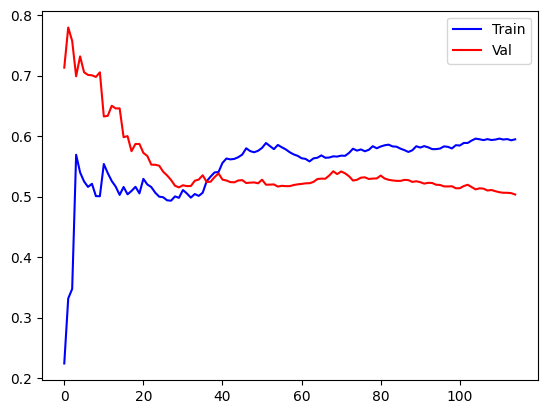

In [126]:
plot_learing_curves(lasso_reg, x_poly ,y )

Lasso 和 岭回归都提供了高权重惩罚，防止小样本量训练产生过拟合
岭回归的惩罚项是平方
Lasso的惩罚项是绝对值
Lasso拟合的alpha值要小于岭回归


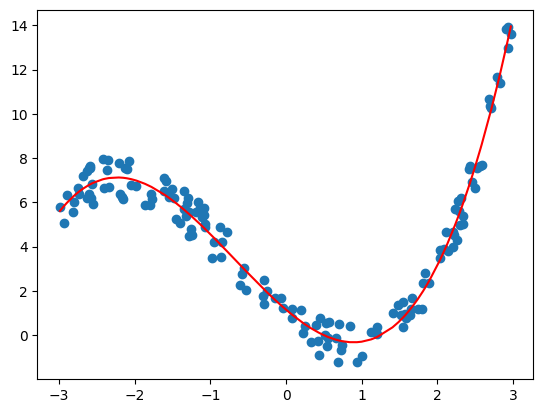

In [127]:
#弹性模型
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet( alpha = 10 , l1_ratio = 0.5)
#l1_ratio是lasso模型权重占比
elastic_reg.fit(x_poly , y)
y_ploy = elastic_reg.predict(x_poly)
plt.plot(x, y_poly , c = 'r' )
plt.scatter(x , y )


弹性模型综合了Lasso和岭回归的惩罚系数，用于复杂的数学模型

In [133]:
#提前停止正则
from sklearn.base import clone 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

from tqdm import tqdm


ploy_scaler = Pipeline([
    ("poly_features" , PolynomialFeatures(degree = 90 ,include_bias = False )),
    ("std_scaler"    , StandardScaler())
])#设置90次幂+标准化

x_train , x_val , y_train , y_val = train_test_split( x , y , test_size= 0.2)

x_train_poly_scaled = ploy_scaler.fit_transform(x_train)
x_val_poly_scaled   = ploy_scaler.fit_transform(x_val)
#流水线处理训练集数据

sgd_reg = SGDRegressor(max_iter= 1 , tol = -np.Infinity , warm_start= True,
                       penalty= None , learning_rate = 'constant' ,eta0 = 0.0005    )
#随机梯度下降回归
mininum_val_error = float("inf")
#默认为正无穷，只要有结果就会比这个值小
best_epoch = None
best_model = None
#最佳迭代次数和最佳模型
best_epoch_val = []
mininum_val_error_val = []
epoch_val   =   []
for epoch in tqdm(range(1000)):
    sgd_reg.fit(x_train_poly_scaled , y_train)

    y_val_predict = sgd_reg.predict(x_val_poly_scaled)
    val_error  = mean_squared_error( y_val_predict , y_val)
  
    if val_error < mininum_val_error:
        mininum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
    
    best_epoch_val.append(best_epoch)
    mininum_val_error_val.append( val_error)
    




  0%|          | 0/1000 [00:00<?, ?it/s]/home/star/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/star/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/star/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/star/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was e

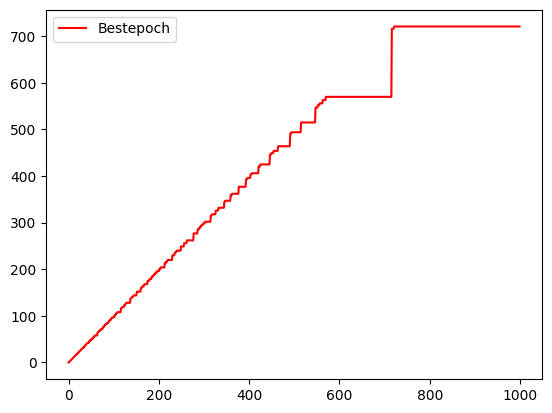

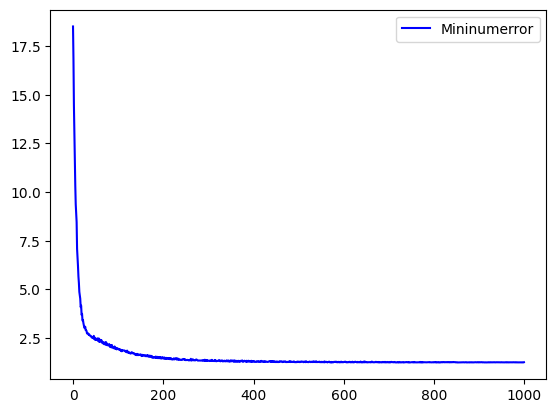

In [134]:
plt.plot(range(len(best_epoch_val)),best_epoch_val , color = 'r' , label = "Bestepoch")
plt.legend()
plt.show()
plt.plot(mininum_val_error_val , color = 'b' , label = "Mininumerror") 
plt.legend()
plt.show()


In [135]:
#逻辑回归
from sklearn import datasets 
#导入鸢尾花数据集
iris = datasets.load_iris()
list(iris.keys())
#导出鸢尾花数据集数据的key

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [150]:
x = iris["data"][:,3:]
y = (iris["target"] == 2)
#导出类别与数据
#x只选取第四列

In [151]:
from sklearn.linear_model import LogisticRegression
#导入逻辑回归

log_reg = LogisticRegression()
log_reg.fit( x, y )


LogisticRegression()

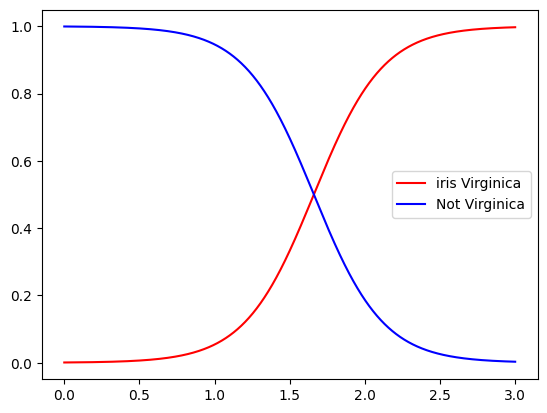

In [153]:
x_new = np.linspace(0,3,2000).reshape(-1,1)
#生成一个在0到3之间有1000个元素的数组 ，并转换成一维数组
y_probablity = log_reg.predict_proba(x_new)
#获得x的可能性
plt.plot(x_new  , y_probablity[:,1] ,color = 'r',label = "iris Virginica" )
plt.plot(x_new  , y_probablity[:,0],color = 'b' ,label = "Not Virginica")
plt.legend()

predict_proba()返回的是一个二维数组，代表的是[  TRUE , FLASE  ]的概率
predict()返回的是一个布尔型变量（0或1）

In [170]:
x = iris["data"][:,2:]
y = (iris["target"] == 2)

log_reg = LogisticRegression()
log_reg.fit( x, y )


LogisticRegression()

In [180]:
k1 = log_reg.coef_[:,0]
k2 = log_reg.coef_[:,1]
d1 = log_reg.intercept_
x1_polt =np.linspace(3, 7, 1000)
y1_plot = (-d1 - k1*x1_polt)/k2


100%|██████████| 150/150 [00:00<00:00, 478.31it/s]


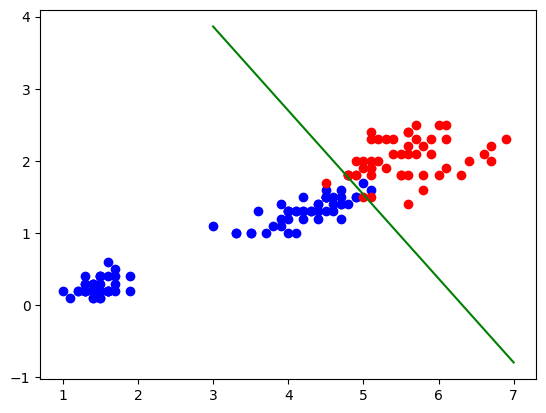

In [186]:
for sample in tqdm(range(len(iris["data"][:,3]))):
    if (iris["target"][sample] == 2):
        plt.scatter(iris["data"][sample,2] , iris["data"][sample,3] ,c= 'r' )
    else :
        plt.scatter(iris["data"][sample,2] , iris["data"][sample,3] ,c= 'b' )

plt.plot(x1_polt , y1_plot , c = 'g')
